Iniziamo le best practices sulle feature
- feature selection, quando vogliamo a priori usare meno feature possibili
- dimensionality reduction, per combinarle invece di selezionarle
- feature augmentation, quando vogliamo aiutare il modello a scoprire le relazioni
- feature importance, quando vogliamo saperlo a posteriori

In [80]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [27]:
X, y = load_boston(return_X_y=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Univariate Feature selection

Un primo approccio è lanciare un test statistico per vedere se esiste una relazione tra ogni singola feature e il target. Poi conservare solo le feat più importanti 

In [36]:
selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X_train, y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x000001CD409D6AF8>)

In [37]:
X_selected = selector.transform(X_train)

In [38]:
X_train.shape, X_selected.shape

((379, 13), (379, 5))

In [39]:
selector.scores_

array([0.35197977, 0.19553242, 0.5268236 , 0.01563189, 0.48146824,
       0.53224773, 0.30991072, 0.31947229, 0.23240845, 0.36421787,
       0.47557473, 0.12732472, 0.6569839 ])

In [40]:
selector.get_support()

array([False, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True])

Posso inserire la feature selection come parte di una pipeline e fare una ricerca con la grid

In [45]:
steps = [
    ( 'selector', SelectKBest(mutual_info_regression) ),
    ( 'model', LinearRegression() )
]
pipeline = Pipeline(steps)

In [51]:
params = {
    'selector__k': [3, 5, 7, 9, 11]
}

grid = GridSearchCV(pipeline, param_grid=params)

In [52]:
grid.fit(X_train, y_train)

C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('selector',
                                        SelectKBest(k=10,
                                                    score_func=<function mutual_info_regression at 0x000001CD409D6AF8>)),
                                       ('model',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'selector__k': [3, 5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
grid.best_params_

{'selector__k': 11}

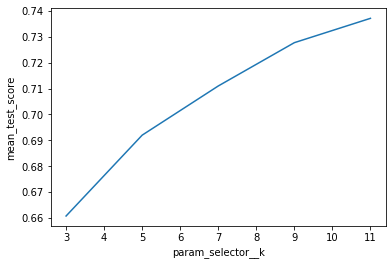

In [57]:
res = pd.DataFrame(grid.cv_results_)
sns.lineplot(data=res, x='param_selector__k', y='mean_test_score')

### Recursive Feature Elimination

Un' altro approccio prevede di addestrare un modello con tutte le feature, togliere quella meno importante, riaddestrarlo di nuovo, togliere la meno importante, e così via fino ad avere il set minimo.
- richiede un modello che assegni importanza alle feature (modelli lineari, alberi)

In [59]:
model = LinearRegression()
selector = RFE(model, n_features_to_select=5, step=1)

In [61]:
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [64]:
X_selected = selector.transform(X_train)
X_selected.shape

(379, 5)

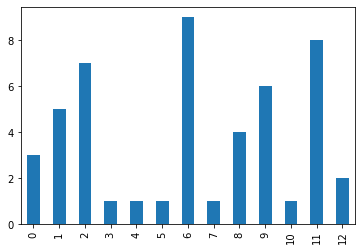

In [88]:
rank = pd.Series(selector.ranking_)
rank.plot.bar()

In [65]:
selector.get_support()

array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False, False])